Bu projede , kalp sağlığını etkileyen faktörleri inceleyerek kalp krizi gecirip gecirmedigini tahminleme projesi gelistiriyoruz.

Kullanılan veri seti :
[Heart_Attack_Dataset - Kaggle](https://www.kaggle.com/datasets/ankushpanday2/heart-attack-prediction-in-united-states/data)

# İmport libraries

Kütüphanelerimizi **import** ederek başlayalım

In [23]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
import warnings

warnings.filterwarnings('ignore')


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/heart-attack/heart_attack_dataset.csv


In [24]:
df = pd.read_csv('/kaggle/input/heart-attack/heart_attack_dataset.csv')

Burada kullanacağımız veri setimizin yolunu kontrol ettikten sonra veri setimizi ekledik

# EDA

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372974 entries, 0 to 372973
Data columns (total 32 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Age                    372974 non-null  int64  
 1   Gender                 372974 non-null  object 
 2   Cholesterol            372974 non-null  int64  
 3   BloodPressure          372974 non-null  int64  
 4   HeartRate              372974 non-null  int64  
 5   BMI                    372974 non-null  float64
 6   Smoker                 372974 non-null  int64  
 7   Diabetes               372974 non-null  int64  
 8   Hypertension           372974 non-null  int64  
 9   FamilyHistory          372974 non-null  int64  
 10  PhysicalActivity       372974 non-null  int64  
 11  AlcoholConsumption     372974 non-null  int64  
 12  Diet                   372974 non-null  object 
 13  StressLevel            372974 non-null  int64  
 14  Ethnicity              372974 non-nu

Veri kümemiz 372974 satır ve 32  sütundan oluşuyor. İlk 31 özelliği öğrenerek, outcome özelliğini tahmin etmeye çalışacağız.

In [26]:
df.head()

,Age,Gender,Cholesterol,BloodPressure,HeartRate,BMI,Smoker,Diabetes,Hypertension,FamilyHistory,...,ExerciseInducedAngina,Slope,NumberOfMajorVessels,Thalassemia,PreviousHeartAttack,StrokeHistory,Residence,EmploymentStatus,MaritalStatus,Outcome
0,31,Male,194,162,71,22.9,0,1,0,0,...,Yes,Downsloping,1,Normal,0,0,Suburban,Retired,Single,No Heart Attack
1,69,Male,208,148,93,33.9,1,1,0,0,...,Yes,Upsloping,2,Normal,0,0,Suburban,Unemployed,Married,No Heart Attack
2,34,Female,132,161,94,34.0,0,0,1,1,...,Yes,Upsloping,0,Normal,1,0,Rural,Retired,Single,Heart Attack
3,53,Male,268,134,91,35.0,0,1,1,0,...,Yes,Flat,0,Reversible defect,1,0,Suburban,Retired,Widowed,No Heart Attack
4,57,Female,203,140,75,30.1,0,1,0,0,...,Yes,Flat,0,Fixed defect,1,0,Rural,Retired,Married,Heart Attack


İlk baştan 5 satırı inceleyelim

In [27]:
df.tail()

,Age,Gender,Cholesterol,BloodPressure,HeartRate,BMI,Smoker,Diabetes,Hypertension,FamilyHistory,...,ExerciseInducedAngina,Slope,NumberOfMajorVessels,Thalassemia,PreviousHeartAttack,StrokeHistory,Residence,EmploymentStatus,MaritalStatus,Outcome
372969,49,Female,285,131,79,27.6,0,1,1,1,...,Yes,Flat,2,Fixed defect,1,0,Urban,Employed,Married,No Heart Attack
372970,77,Male,197,159,64,33.5,0,1,0,1,...,No,Downsloping,3,Fixed defect,0,1,Urban,Employed,Married,Heart Attack
372971,53,Female,243,94,84,34.7,1,1,1,0,...,Yes,Flat,3,Reversible defect,1,1,Urban,Retired,Married,Heart Attack
372972,78,Female,291,93,78,29.3,1,1,0,1,...,Yes,Upsloping,1,Fixed defect,0,0,Urban,Employed,Married,No Heart Attack
372973,71,Male,127,153,83,39.7,1,1,1,0,...,No,Upsloping,3,Fixed defect,1,1,Urban,Unemployed,Single,Heart Attack


En sondan 5 satırı inceleyelim

In [28]:
df.describe()

,Age,Cholesterol,BloodPressure,HeartRate,BMI,Smoker,Diabetes,Hypertension,FamilyHistory,PhysicalActivity,AlcoholConsumption,StressLevel,Income,MaxHeartRate,ST_Depression,NumberOfMajorVessels,PreviousHeartAttack,StrokeHistory
count,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000
mean,56.975151,199.455844,134.508234,89.495043,29.006733,0.499225,0.500987,0.500973,0.499901,3.003475,2.000048,5.001885,110033.409913,149.463896,2.501799,1.498525,0.496938,0.500815
std,15.867016,57.723381,25.984528,17.342658,6.345460,0.500000,0.500000,0.500000,0.500001,2.000114,1.414572,2.582025,51961.721991,28.849990,1.443696,1.118003,0.499991,0.500000
min,30.000000,100.000000,90.000000,60.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,20000.000000,100.000000,0.000000,0.000000,0.000000,0.000000
25%,43.000000,149.000000,112.000000,74.000000,23.500000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,64957.250000,124.000000,1.250000,0.000000,0.000000,0.000000
50%,57.000000,199.000000,134.000000,89.000000,29.000000,0.000000,1.000000,1.000000,0.000000,3.000000,2.000000,5.000000,110111.000000,149.000000,2.500000,1.000000,0.000000,1.000000
75%,71.000000,249.000000,157.000000,105.000000,34.500000,1.000000,1.000000,1.000000,1.000000,5.000000,3.000000,7.000000,155012.000000,174.000000,3.750000,2.000000,1.000000,1.000000
max,84.000000,299.000000,179.000000,119.000000,40.000000,1.000000,1.000000,1.000000,1.000000,6.000000,4.000000,9.000000,199999.000000,199.000000,5.000000,3.000000,1.000000,1.000000


Verileri inceledikten sonra encoding aşamasına geçebiliriz.

# ENCODING

In [29]:
df['Outcome'] = df['Outcome'].map({'No Heart Attack': 0, 'Heart Attack': 1})
print(df['Outcome'].value_counts())


Outcome
0    186658
1    186316
Name: count, dtype: int64


Kalp krizini 1 Kalp Krizi olmayanı 0 olarak sayısal verilere dönüştürdük . Dağılımın dengeli oldugu gözüküyor

In [30]:
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"{col}: {df[col].nunique()}")


Gender: 2
Diet: 3
Ethnicity: 5
EducationLevel: 3
Medication: 2
ChestPainType: 4
ECGResults: 3
ExerciseInducedAngina: 2
Slope: 3
Thalassemia: 3
Residence: 3
EmploymentStatus: 3
MaritalStatus: 4


'**Gender**' ,' **Medication**' ,'**ExerciseInducedAngina**' sütunları 2 değer içerirken diğer sütunlar daha fazla değer içeriyor . Bu belirttiğim sütunlarda label encoding kullanırken diğer sütunlarda one hatch encoding tercih ediyorum.

In [31]:
label_enc_cols = ['Gender', 'Medication', 'ExerciseInducedAngina']

le = LabelEncoder()
for col in label_enc_cols:
    df[col] = le.fit_transform(df[col])


In [32]:
onehot_enc_cols = ['Diet', 'Ethnicity', 'EducationLevel', 'ChestPainType', 'ECGResults',
                   'Slope', 'Thalassemia', 'Residence', 'EmploymentStatus', 'MaritalStatus']

df = pd.get_dummies(df, columns=onehot_enc_cols, drop_first=True)


Encoding işlemi bittikten sonra bir kez daha kontrol gerçekleştiriyorum

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372974 entries, 0 to 372973
Data columns (total 46 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Age                            372974 non-null  int64  
 1   Gender                         372974 non-null  int64  
 2   Cholesterol                    372974 non-null  int64  
 3   BloodPressure                  372974 non-null  int64  
 4   HeartRate                      372974 non-null  int64  
 5   BMI                            372974 non-null  float64
 6   Smoker                         372974 non-null  int64  
 7   Diabetes                       372974 non-null  int64  
 8   Hypertension                   372974 non-null  int64  
 9   FamilyHistory                  372974 non-null  int64  
 10  PhysicalActivity               372974 non-null  int64  
 11  AlcoholConsumption             372974 non-null  int64  
 12  StressLevel                   

# Özellik Seçimi & Korelasyon Matrisi

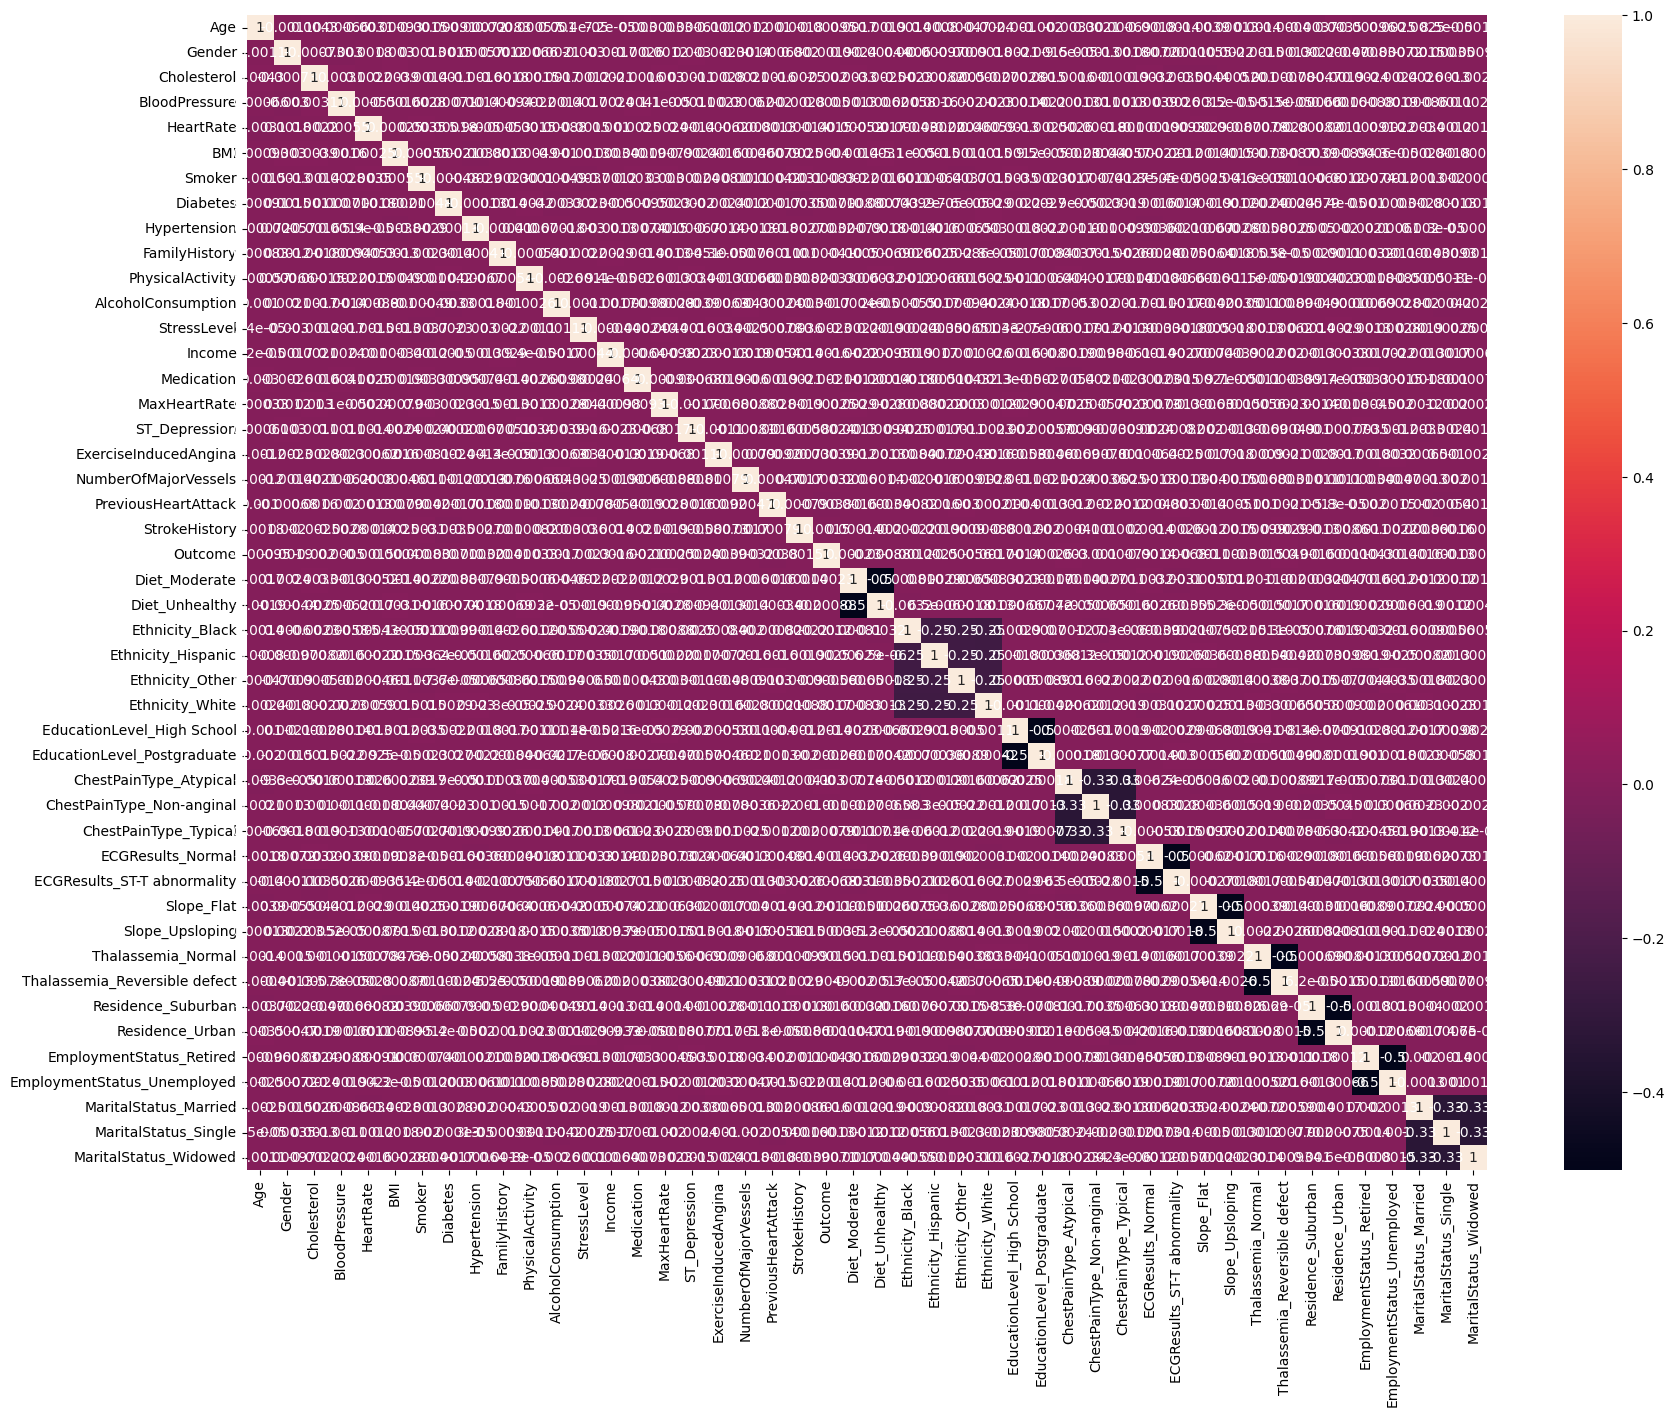

In [34]:
corr_matrix = df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [35]:
df.corr()

,Age,Gender,Cholesterol,BloodPressure,HeartRate,BMI,Smoker,Diabetes,Hypertension,FamilyHistory,...,Slope_Upsloping,Thalassemia_Normal,Thalassemia_Reversible defect,Residence_Suburban,Residence_Urban,EmploymentStatus_Retired,EmploymentStatus_Unemployed,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed
Age,1.000000,-0.001107,0.004333,0.000662,-0.003064,0.000928,-0.001535,0.000910,-0.000724,0.000826,...,0.000133,0.001363,-0.000400,-3.743162e-03,0.003504,-0.000962,0.002455,-0.002455,0.000085,-0.001131
Gender,-0.001107,1.000000,-0.000731,-0.003038,0.001799,0.002980,0.001348,0.001477,0.000571,0.001239,...,0.002208,-0.001476,-0.001282,2.226242e-03,-0.000473,-0.000829,-0.000723,-0.001494,0.000352,0.000972
Cholesterol,0.004333,-0.000731,1.000000,0.003120,0.002186,0.003879,-0.001386,0.001099,-0.001604,-0.001823,...,0.000521,0.001018,-0.000780,-4.746778e-04,-0.001884,0.002419,-0.002367,0.002635,0.001308,-0.002211
BloodPressure,0.000662,-0.003038,0.003120,1.000000,0.000545,-0.001592,0.002798,0.000714,0.001351,-0.000945,...,0.000035,-0.001542,-0.000053,-6.610358e-04,0.000163,0.000877,-0.001896,0.000864,-0.001079,0.002397
HeartRate,-0.003064,0.001799,0.002186,0.000545,1.000000,0.000250,0.003537,0.000185,0.000059,0.000530,...,-0.000868,-0.000781,0.002760,-8.242154e-04,0.001133,-0.000908,0.002184,-0.003417,-0.001198,0.001639
BMI,0.000928,0.002980,0.003879,-0.001592,0.000250,1.000000,0.000547,-0.000206,-0.003841,0.001280,...,0.001463,0.000731,-0.000870,-3.877947e-03,0.000890,-0.000602,0.000043,-0.002772,0.001813,-0.000284
Smoker,-0.001535,0.001348,-0.001386,0.002798,0.003537,0.000547,1.000000,-0.000480,-0.002855,-0.002279,...,-0.001343,-0.000046,0.001100,-6.576406e-04,-0.001201,-0.000741,-0.001198,-0.001266,0.001954,-0.000397
Diabetes,0.000910,0.001477,0.001099,0.000714,0.000185,-0.000206,-0.000480,1.000000,-0.000133,0.001416,...,-0.001208,0.000245,-0.000238,7.892922e-04,-0.000054,0.001010,0.000295,0.002833,-0.000134,-0.001692
Hypertension,-0.000724,0.000571,-0.001604,0.001351,0.000059,-0.003841,-0.002855,-0.000133,1.000000,-0.000413,...,0.000278,-0.000577,-0.000253,5.014098e-04,0.002037,-0.002076,0.000610,0.002005,0.000030,-0.000637
FamilyHistory,0.000826,0.001239,-0.001823,-0.000945,0.000530,0.001280,-0.002279,0.001416,-0.000413,1.000000,...,0.001818,0.000379,0.000055,-2.922545e-03,0.001056,0.000317,0.001073,-0.000432,-0.000930,0.001915


# Model Seçimi Ve Eğitim

In [36]:
x = df.drop('Outcome', axis=1)
y = df['Outcome']

x → modelin öğrenmesi için özellikler

y → modelin tahmin etmeye çalışacağı özellik

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=42,stratify=y)

Verinin %20'sini test seti, %80'ini eğitim seti olarak ayırıyoruz

In [38]:
Logistic_Regression=LogisticRegression()

lojistik regresyon modeli oluşturuyoruz

In [39]:
Logistic_Regression.fit(x_train, y_train)

y_pred = Logistic_Regression.predict(x_test)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='binary')

print("Accuracy:", round(acc, 2))
print("F1 Score:", round(f1, 2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5
F1 Score: 0.39
Confusion Matrix:
 [[25254 12078]
 [25265 11998]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.68      0.57     37332
           1       0.50      0.32      0.39     37263

    accuracy                           0.50     74595
   macro avg       0.50      0.50      0.48     74595
weighted avg       0.50      0.50      0.48     74595



Burada **Lojistik regresyon** modelini eğitim verisiyle eğitiyoruz ardından test verisinde tahmin yaptırıyoruz. Doğruluk, F1 skoru gibi parametrelerin değerlerini yazdırıyoruz.

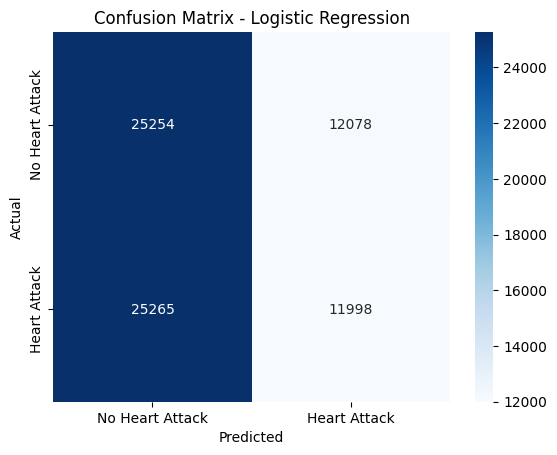

In [40]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Heart Attack", "Heart Attack"], yticklabels=["No Heart Attack", "Heart Attack"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

* **True Pozitive** 11,998 kişi kalp krizi geçirmiş ve model bunu doğru tahmin ediyor . 
* **True Negative** 25,254 kişi kalp krizi geçirmemiş ve model bunu doğru tahmin ediyor .

* **False Pozitive** 12,078 kişi kalp krizi geçirmemiş ama model bunu yanlış tahmin ediyor.
* **False Negative** 25,265 kişi kalp krizi geçirmiş ama model bunu yanlış tahmin ediyor.

In [41]:
Decision_Tree = DecisionTreeClassifier(max_depth=3, random_state=42)

Decision_Tree.fit(x_train, y_train)

y_pred = Decision_Tree.predict(x_test)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='binary')

print("Accuracy:", round(acc, 2))
print("F1 Score:", round(f1, 2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))




Accuracy: 0.5
F1 Score: 0.5
Confusion Matrix:
 [[18297 19035]
 [18400 18863]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.49      0.49     37332
           1       0.50      0.51      0.50     37263

    accuracy                           0.50     74595
   macro avg       0.50      0.50      0.50     74595
weighted avg       0.50      0.50      0.50     74595



**True Positives :** 18863 Kalp krizi olanları doğru tahmin etmiş.

**True Negatives :** 18297 Kalp krizi olmayanları doğru tahmin etmiş.

**False Positives:** 19035 Kalp krizi yok ama model var demiş.

**False Negatives:** 18400 Kalp krizi var ama model yok demiş.

**FP** ve **FN** sayıları oldukça yüksek. Yani model yanlış tahminlerde çok fazla hata yapıyor.

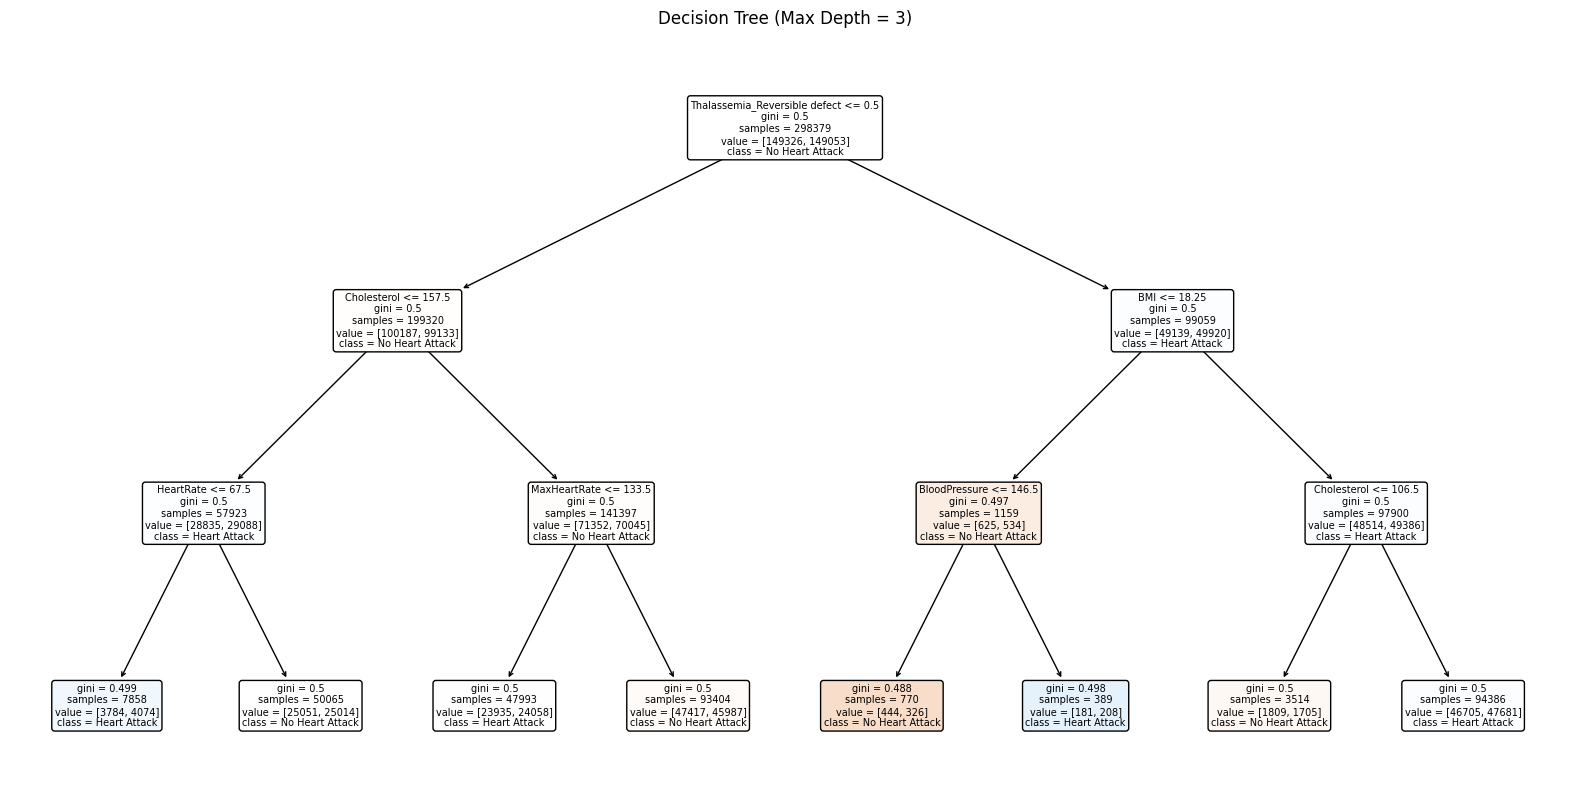

In [45]:
plt.figure(figsize=(20, 10))
plot_tree(Decision_Tree,
          feature_names=x_train.columns,
          class_names=["No Heart Attack", "Heart Attack"],
          filled=True,
          rounded=True)
plt.title("Decision Tree (Max Depth = 3)")
plt.show()